In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

In [3]:
df = pd.read_csv(DATOS_DIR + 'Iris.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
T = np.array(df.iloc[:,-1])

#Hay 50 muestras de cada tipo de flor
print(T[[1,50,100]])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
# convertimos las etiquetas categóricas en numéricas
encoder = preprocessing.LabelEncoder()
T = encoder.fit_transform(T)
print(T[[1,50,100]])

[0 1 2]


In [5]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
        X, T, test_size=0.30) #, random_state=42)

T_trainB = to_categorical(T_train)
print(T_trainB[:5, :])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [6]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # normalización usando media y desvío
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [7]:
# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

# Imprimir un resumen del modelo
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Configuración para entrenamiento
model.compile(optimizer=SGD(learning_rate=0.05), loss='mse', metrics=['accuracy'])
#model.compile(optimizer=SGD(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
H = model.fit(X_train,T_trainB, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.0190
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.0190
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.0190
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.0190
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.0190
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.0190
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.0190
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.0190
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.0190
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.0190
Epoch 11/1000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.5143
Epoch 84/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.5238
Epoch 85/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.5333
Epoch 86/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.5429
Epoch 87/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.5524
Epoch 88/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.5619
Epoch 89/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.5810
Epoch 90/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.5810
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.5905
Epoch 92/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.5905
Epoch 93/1000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.1594 - accuracy: 0.7238
Epoch 166/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.7238
Epoch 167/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1581 - accuracy: 0.7238
Epoch 168/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1576 - accuracy: 0.7238
Epoch 169/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.7238
Epoch 170/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1563 - accuracy: 0.7238
Epoch 171/1000
4/4 [==============================] - 0s 928us/step - loss: 0.1557 - accuracy: 0.7238
Epoch 172/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.7238
Epoch 173/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1546 - accuracy: 0.7238
Epoch 174/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1540 - accuracy: 0.7238
Epoch 175/1000
4/4 

4/4 [==============================] - 0s 199us/step - loss: 0.1259 - accuracy: 0.7524
Epoch 248/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.7524
Epoch 249/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.7524
Epoch 250/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.7524
Epoch 251/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1249 - accuracy: 0.7524
Epoch 252/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.7524
Epoch 253/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1244 - accuracy: 0.7524
Epoch 254/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.7524
Epoch 255/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1240 - accuracy: 0.7524
Epoch 256/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.7524
Epoch 257/1000

4/4 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.7714
Epoch 330/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.7714
Epoch 331/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.7714
Epoch 332/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.7714
Epoch 333/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.7714
Epoch 334/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.7714
Epoch 335/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.7714
Epoch 336/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.7714
Epoch 337/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.7714
Epoch 338/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.7714
Epoch 339/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.8190
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.8190
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.8190
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.8190
Epoch 415/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1037 - accuracy: 0.8190
Epoch 416/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1036 - accuracy: 0.8190
Epoch 417/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.8190
Epoch 418/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1034 - accuracy: 0.8190
Epoch 419/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1034 - accuracy: 0.8190
Epoch 420/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1033 - accuracy: 0.8190
Epoch 421/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.8190
Epoch 494/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.8190
Epoch 495/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0981 - accuracy: 0.8190
Epoch 496/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8190
Epoch 497/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0979 - accuracy: 0.8190
Epoch 498/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0979 - accuracy: 0.8190
Epoch 499/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.8190
Epoch 500/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.8190
Epoch 501/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0977 - accuracy: 0.8190
Epoch 502/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0976 - accuracy: 0.8190
Epoch 503/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.8476
Epoch 576/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.8476
Epoch 577/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0929 - accuracy: 0.8476
Epoch 578/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.8476
Epoch 579/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.8476
Epoch 580/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0927 - accuracy: 0.8476
Epoch 581/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0926 - accuracy: 0.8476
Epoch 582/1000
4/4 [==============================] - 0s 252us/step - loss: 0.0926 - accuracy: 0.8476
Epoch 583/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.8476
Epoch 584/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0924 - accuracy: 0.8476
Epoch 585/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.8476
Epoch 658/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.8476
Epoch 659/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.8476
Epoch 660/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.8476
Epoch 661/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0872 - accuracy: 0.8476
Epoch 662/1000
4/4 [==============================] - 0s 948us/step - loss: 0.0872 - accuracy: 0.8476
Epoch 663/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0871 - accuracy: 0.8476
Epoch 664/1000
4/4 [==============================] - 0s 986us/step - loss: 0.0870 - accuracy: 0.8476
Epoch 665/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.8476
Epoch 666/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.8476
Epoch 667/10

4/4 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.8571
Epoch 740/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.8571
Epoch 741/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.8571
Epoch 742/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0810 - accuracy: 0.8571
Epoch 743/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.8571
Epoch 744/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.8571
Epoch 745/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0807 - accuracy: 0.8571
Epoch 746/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.8571
Epoch 747/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0806 - accuracy: 0.8571
Epoch 748/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0805 - accuracy: 0.8571
Epoch 749/1000
4/4

4/4 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9048
Epoch 822/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0742 - accuracy: 0.9048
Epoch 823/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9048
Epoch 824/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0740 - accuracy: 0.9048
Epoch 825/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9048
Epoch 826/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9048
Epoch 827/1000
4/4 [==============================] - 0s 516us/step - loss: 0.0737 - accuracy: 0.9048
Epoch 828/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0736 - accuracy: 0.9048
Epoch 829/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9048
Epoch 830/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9048
Epoch 831/100

4/4 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9333
Epoch 904/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9238
Epoch 905/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9333
Epoch 906/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9333
Epoch 907/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9333
Epoch 908/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9333
Epoch 909/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9333
Epoch 910/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9333
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9333
Epoch 912/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0663 - accuracy: 0.9333
Epoch 913/1000
4

Epoch 985/1000
4/4 [==============================] - 0s 947us/step - loss: 0.0602 - accuracy: 0.9619
Epoch 986/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0601 - accuracy: 0.9619
Epoch 987/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9619
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9619
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9619
Epoch 990/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9619
Epoch 991/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9619
Epoch 992/1000
4/4 [==============================] - 0s 304us/step - loss: 0.0596 - accuracy: 0.9619
Epoch 993/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9619
Epoch 994/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0594 - accuracy:

In [10]:
# Calcular el error del modelo
score = model.evaluate(X_train, T_trainB) 
print('Error :', score[0]) 
print('Accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9619
Error : 0.058846745640039444
Accuracy: 0.961904764175415


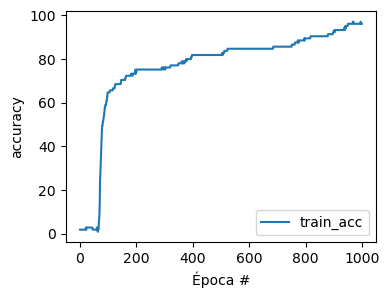

In [11]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])

N = np.arange(0, len(accuracy))
plt.figure(figsize=(4,3))
plt.plot(N, 100*accuracy, label="train_acc")
#plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("accuracy")
plt.legend(loc="lower right")

In [12]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
print(Y_pred[:5])

Y_pred2 = np.argmax(Y_pred,axis=1)
print(Y_pred2[:5])

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(T_train, Y_pred2))

4/4 [==============================] - 0s 2ms/step
[[0.04466249 0.4802062  0.5237466 ]
 [0.814908   0.2890148  0.0422195 ]
 [0.01381904 0.39270782 0.81937945]
 [0.32061857 0.68984157 0.05652505]
 [0.09820504 0.4997157  0.32514912]]
[2 0 2 1 1]
% aciertos X_train : 0.962


In [13]:
report = metrics.classification_report(T_train, Y_pred2)
print("Confusion matrix Training:\n%s" % report) 

MM = metrics.confusion_matrix(T_train, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.86      0.93        29
           2       0.93      1.00      0.96        38

    accuracy                           0.96       105
   macro avg       0.97      0.95      0.96       105
weighted avg       0.96      0.96      0.96       105

Confusion matrix:
[[38  0  0]
 [ 1 25  3]
 [ 0  0 38]]


In [14]:
model.save("miniIris.keras")

In [15]:
from keras.models import load_model
modelo2 = load_model("miniIris.keras")
modelo2.summary()

# predecir la salida del modelo
Y_pred = modelo2.predict(X_train)
print(Y_pred[:5])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 1ms/step
[[0.04466249 0.4802062  0.5237466 ]
 [0.814908   0.2890148  0.0422195 ]
 [0.01381904 0.39270782 0.81937945]
 [0.32061857 0.68984157 0.05652505]
 [0.09820504 0.4997157  0.32514912]]
